<a href="https://colab.research.google.com/github/govardhan2022/Sentimental-Analysis/blob/main/SARF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb

In [ ]:
df=pd.read_csv("/content/train.csv")
df1=pd.read_csv("/content/test.csv")
df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
df1.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [ ]:
df.shape

(31962, 3)

In [ ]:
df1.shape

(17197, 2)

In [ ]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [ ]:
df1.describe()

,id
count,17197.000000
mean,40561.000000
std,4964.490625
min,31963.000000
25%,36262.000000
50%,40561.000000
75%,44860.000000
max,49159.000000


In [ ]:
df.count()

id       31962
label    31962
tweet    31962
dtype: int64

In [ ]:
df1.count()

id       17197
tweet    17197
dtype: int64

In [ ]:
df.value_counts('label')

label
0    29720
1     2242
dtype: int64

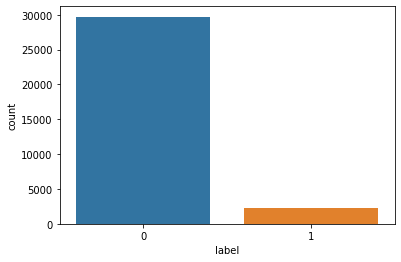

In [ ]:
sb.countplot(data=df,x="label")

In [ ]:
df1.tweet.str.replace("@user"," ")

0         studiolife  aislife  requires  passion  dedic...
1            white  supremacists want everyone to see t...
2        safe ways to heal your  acne       altwaystohe...
3        is the hp and the cursed child book up for res...
4           rd  bihday to my amazing  hilarious  nephew...
                               ...                        
17192    thought factory  left right polarisation   tru...
17193    feeling like a mermaid       hairflip  neverre...
17194     hillary  campaigned today in  ohio  omg    am...
17195    happy  at work conference  right mindset leads...
17196    my   song  so glad  free download    shoegaze ...
Name: tweet, Length: 17197, dtype: object

In [ ]:
df.tweet.str.replace("@user"," ")

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
31957   NaN
31958   NaN
31959   NaN
31960   NaN
31961   NaN
Name: tweet, Length: 31962, dtype: float64

In [ ]:
df['tweet'] = df.tweet.str.replace("@user"," ")
df['tweet'] = df.tweet.str.replace("#"," ")
df['tweet'] = df.tweet.str.replace("[^a-zA-Z#]"," ")
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,id,label,tweet
0,1,0,when a father is dysfunctional and is so se...
1,2,0,thanks for lyft credit i can t use cause ...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in ...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,ate isz that youuu ...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,sikh temple vandalised in in calgary ws...


In [ ]:
df1['tweet'] = df1.tweet.str.replace("@user"," ")
df1['tweet'] = df1.tweet.str.replace("#"," ")
df1['tweet'] = df1.tweet.str.replace("[^a-zA-Z#]"," ")
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,id,tweet
0,31963,studiolife aislife requires passion dedic...
1,31964,white supremacists want everyone to see t...
2,31965,safe ways to heal your acne altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,rd bihday to my amazing hilarious nephew...
...,...,...
17192,49155,thought factory left right polarisation tru...
17193,49156,feeling like a mermaid hairflip neverre...
17194,49157,hillary campaigned today in ohio omg am...
17195,49158,happy at work conference right mindset leads...


In [ ]:
from collections import Counter
all_words = []
for line in list(df['tweet']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())
a = Counter(all_words).most_common(10)
a

[('the', 10239),
 ('to', 9868),
 ('i', 7625),
 ('a', 6545),
 ('you', 5952),
 ('and', 4948),
 ('in', 4705),
 ('for', 4512),
 ('of', 4262),
 ('is', 4198)]

In [ ]:
df['tweet'] = df['tweet'].apply(lambda x: x.split())
df.head()

,id,label,tweet
0,1,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,"[thanks, for, lyft, credit, i, can, t, use, ca..."
2,3,0,"[bihday, your, majesty]"
3,4,0,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,"[factsguide, society, now, motivation]"


In [ ]:
from nltk.stem import PorterStemmer
stemmer= PorterStemmer()
df['tweet'] = df['tweet'].apply(lambda x: [stemmer.stem(i)for i in x])
df.head()

,id,label,tweet
0,1,0,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,"[thank, for, lyft, credit, i, can, t, use, cau..."
2,3,0,"[bihday, your, majesti]"
3,4,0,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,"[factsguid, societi, now, motiv]"


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','get']
stopwords.extend(newStopWords)

In [ ]:
import string
def process(text):
  nopunc = set(char for char in list(text) if char not in string.punctuation)
  nopunc = " ".join(nopunc)
  return[word for word in nopunc.lower().split() if word.lower() not in stopwords]

In [ ]:
df['tweet'] = df['tweet'].apply(process)
df.head()

,id,label,tweet
0,1,0,"[father, drag, dysfunct, hi, kid, run, selfish]"
1,2,0,"[credit, offer, use, van, caus, thank, getthan..."
2,3,0,"[bihday, majesti]"
3,4,0,"[model, time, love, take]"
4,5,0,"[factsguid, motiv, societi]"


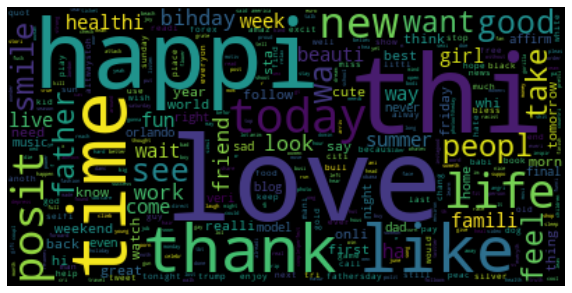

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
words = []
for line in df['tweet']:
  words.extend(line)
wordfreq = Counter(words)
wordcloud = WordCloud(background_color = 'black',max_words = 2000,stopwords = stopwords).generate_from_frequencies(wordfreq)
plt.figure(figsize = (10,9))
plt.imshow(wordcloud , interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
def string (text):
  to_return = ""
  for i in list(text):
    to_return += str(i) + " "
  to_return = to_return[:-1]
  return to_return
df['tweet'] =  df['tweet'].apply(string)
df.head()

,id,label,tweet
0,1,0,father drag dysfunct hi kid run selfish
1,2,0,credit offer use van caus thank getthank pdx l...
2,3,0,bihday majesti
3,4,0,model time love take
4,5,0,factsguid motiv societi


In [ ]:
def string (text):
  to_return = ""
  for i in list(text):
    to_return += str(i) + " "
  to_return = to_return[:-1]
  return to_return
df1['tweet'] =  df1['tweet'].apply(string)
df1.head()

,id,tweet
0,31963,s t u d i o l i f e a i s l i f e r ...
1,31964,w h i t e s u p r e m a c i s t s ...
2,31965,s a f e w a y s t o h e a l y o u r ...
3,31966,i s t h e h p a n d t h e c u r s e ...
4,31967,r d b i h d a y t o m y a m a ...


(-0.5, 399.5, 199.5, -0.5)

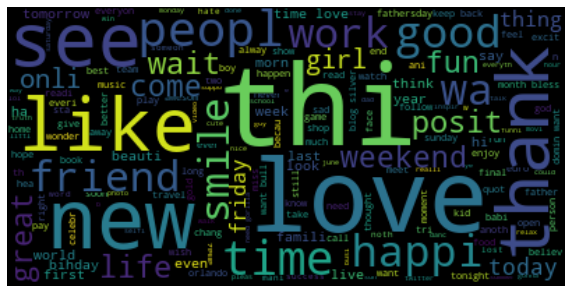

In [ ]:
positive = [r for r in df['tweet'][df['label']==0]]
pos = ''.join(positive)
wordcloud = WordCloud(background_color = 'black',max_words = 2000,stopwords = stopwords).generate(pos)
plt.figure(figsize = (10,9))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

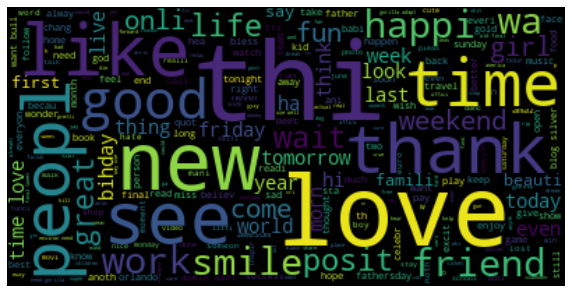

In [ ]:
negative = [r for r in df['tweet'][df['label']==1]]
neg = ''.join(negative)
wordcloud = WordCloud(background_color = 'black',max_words = 2000,stopwords = stopwords).generate(pos)
plt.figure(figsize = (10,9))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [ ]:
df.drop(["id"],axis= 1 , inplace =  True)
df.head()

,label,tweet
0,0,father drag dysfunct hi kid run selfish
1,0,credit offer use van caus thank getthank pdx l...
2,0,bihday majesti
3,0,model time love take
4,0,factsguid motiv societi


In [ ]:
df1.drop(["id"],axis= 1 , inplace =  True)
df1.head()

,tweet
0,s t u d i o l i f e a i s l i f e r ...
1,w h i t e s u p r e m a c i s t s ...
2,s a f e w a y s t o h e a l y o u r ...
3,i s t h e h p a n d t h e c u r s e ...
4,r d b i h d a y t o m y a m a ...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["tweet"],df["label"],test_size = 0.2, random_state = 42)
print("training set :",x_train.shape,y_train.shape)
print("testing set :",x_test.shape,y_test.shape)

training set : (25569,) (25569,)
testing set : (6393,) (6393,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
CountVect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [ ]:
test_x = df['tweet']
test_x

0                  father drag dysfunct hi kid run selfish
1        credit offer use van caus thank getthank pdx l...
2                                           bihday majesti
3                                     model time love take
4                                  factsguid motiv societi
                               ...                        
31957                                        youuu isz ate
31958    turner imwithh mantl wrap hero nina see chisol...
31959                 monday song otw morn work sad listen
31960          sikh wso calgari templ vandalis act condemn
31961                                         thank follow
Name: tweet, Length: 31962, dtype: object